In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./실습데이터/weather_nominal.csv', sep=',' , encoding='cp949')

In [3]:
df

,outlook,temperature,humidity,windy,play
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes
5,sunny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,rainy,mild,high,False,no
8,rainy,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
df.sample(1)

,outlook,temperature,humidity,windy,play
13,sunny,mild,high,True,no


In [6]:
#전처리부터 합시다
outlook_dic = {'overcast' : 0, 'rainy' : 1, 'sunny' : 2}
temperature_dic = {'cool' : 0, 'hot' : 1, 'mild' : 2}
humidity_dic = {'high' : 0, 'normal' : 1}
windy_dic = {False : 0, True : 1}

In [7]:
df['outlook'] = df['outlook'].map(outlook_dic)
df['temperature'] = df['temperature'].map(temperature_dic)
df['humidity'] = df['humidity'].map(humidity_dic)
df['windy'] = df['windy'].map(windy_dic)

In [8]:
df

,outlook,temperature,humidity,windy,play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes
5,2,0,1,1,no
6,0,0,1,1,yes
7,1,2,0,0,no
8,1,0,1,0,yes
9,2,2,1,0,yes


In [9]:
X = df.iloc[:,:-1]
#X = data.iloc[:,0:4]

In [10]:
y = df.play

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
MNB = MultinomialNB()

In [13]:
MNB.fit(X,y)

MultinomialNB()

In [14]:
MNB.score(X,y)

0.7857142857142857

In [16]:
#outlook_dic = {'overcast' : 0, 'rainy' : 1, 'sunny' : 2}
#temperature_dic = {'cool' : 0, 'hot' : 1, 'mild' : 2}
#humidity_dic = {'high' : 0, 'normal' : 1}
#windy_dic = {False : 0, True : 1}

In [17]:
MNB.predict_proba([[1,2,0,1]])

array([[0.48708265, 0.51291735]])

In [18]:
MNB.predict([[1,2,0,1]])

array(['yes'], dtype='<U3')

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

In [20]:
tree =DecisionTreeClassifier()
tree.fit(X,y)

DecisionTreeClassifier()

In [21]:
tree.score(X,y)

1.0

In [22]:
tree.predict([[1,2,0,1]])

array(['no'], dtype=object)

In [24]:
table_names = ['outlook', 'temperature', 'humidity', 'windy']
table_target = ['no', 'yes']

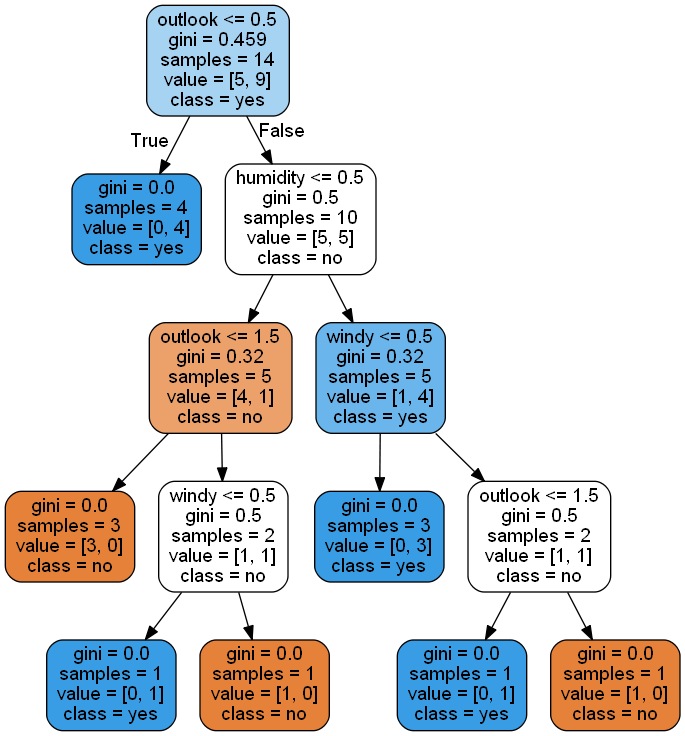

In [26]:
export_graphviz(tree, out_file='golfplay.dot', feature_names=table_names,\
                class_names=table_target, rounded=True, filled=True, impurity=True)
graph = pydot.graph_from_dot_file('golfplay.dot')[0]
golfplay_png = graph.create_png()
Image(golfplay_png)

In [15]:
#파이썬 라이브러리 : numpy, pandas, seaborn

# 인공지능- 머신러닝 사용툴 - sklearn -datasets: load_iris, load_breast_cancer, samples_generator - make_blobs
# 인공지능 - 머신러닝 사용툴 - sklearn -model_selection
# 인공지능 -머신러닝 사용툴 - sklearn-  model_selection
# 인공지능 -머신러닝 사용툴 - sklearn-  naive_bayes
# 인공지능 -머신러닝 사용툴 - sklearn-  neighbors - KNeighborsClassifier
# 인공지능 -머신러닝 사용툴 - sklearn-  svm - SVC - kernel, gamma, C
# 인공지능 -머신러닝 사용툴 - sklearn-  tree - DecisionTree

